In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
import datetime
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [2]:
# load the dataset
dataset = './london_merged.csv'
df = pd.read_csv(dataset)

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
print('Dataset Dimension: ', df.shape)

Dataset Dimension:  (17414, 10)


In [4]:
# display data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [6]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [7]:
# We can see that the timestamp is broad with year, month, days and hours. We can break it down to get more insight on the data

# Make copy of dataframe
df_copy = df.copy()

df_copy.timestamp = pd.to_datetime(df_copy['timestamp']) # Convert to datatime object

df_copy['year'] = df_copy.timestamp.dt.year  # extract years column
df_copy['month'] = df_copy.timestamp.dt.month_name() # extract month column
df_copy['day'] = df_copy.timestamp.dt.day_name() # extract days column
df_copy['hour'] = df_copy.timestamp.dt.hour # extract hours column

display(df_copy) # display df copy

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,January,Sunday,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,January,Sunday,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,January,Sunday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,January,Tuesday,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,January,Tuesday,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,January,Tuesday,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,January,Tuesday,22


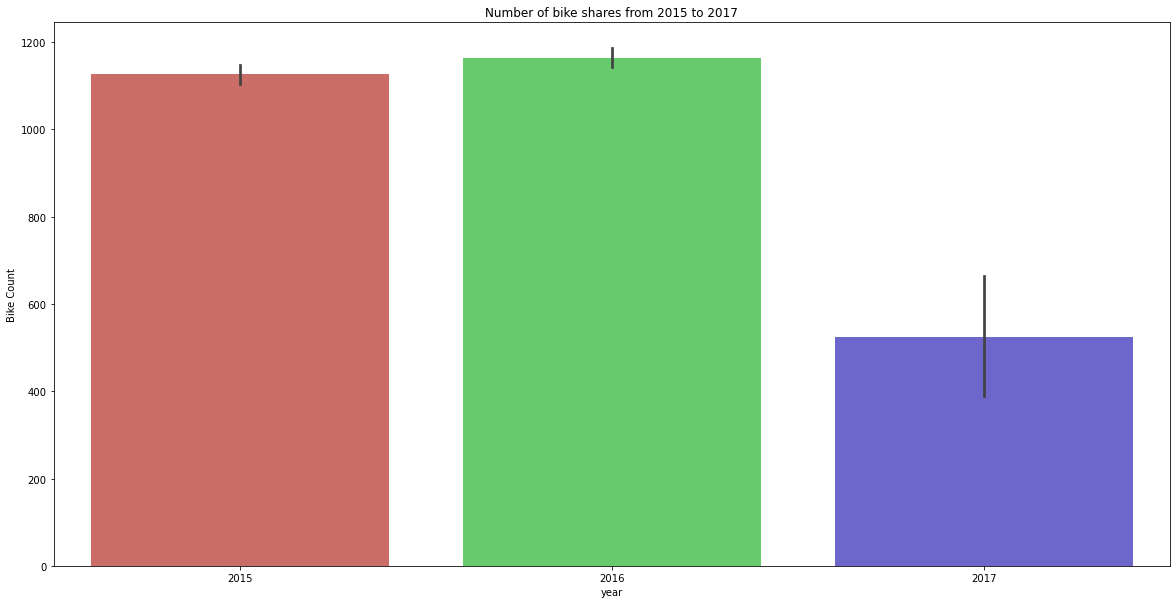

In [8]:
# Plot to show bike shares each year
plt.figure(figsize=(20,10))
sns.barplot(x='year', y='cnt', data=df_copy, palette='hls')
plt.ylabel("Bike Count")
plt.title("Number of bike shares from 2015 to 2017")
plt.show()

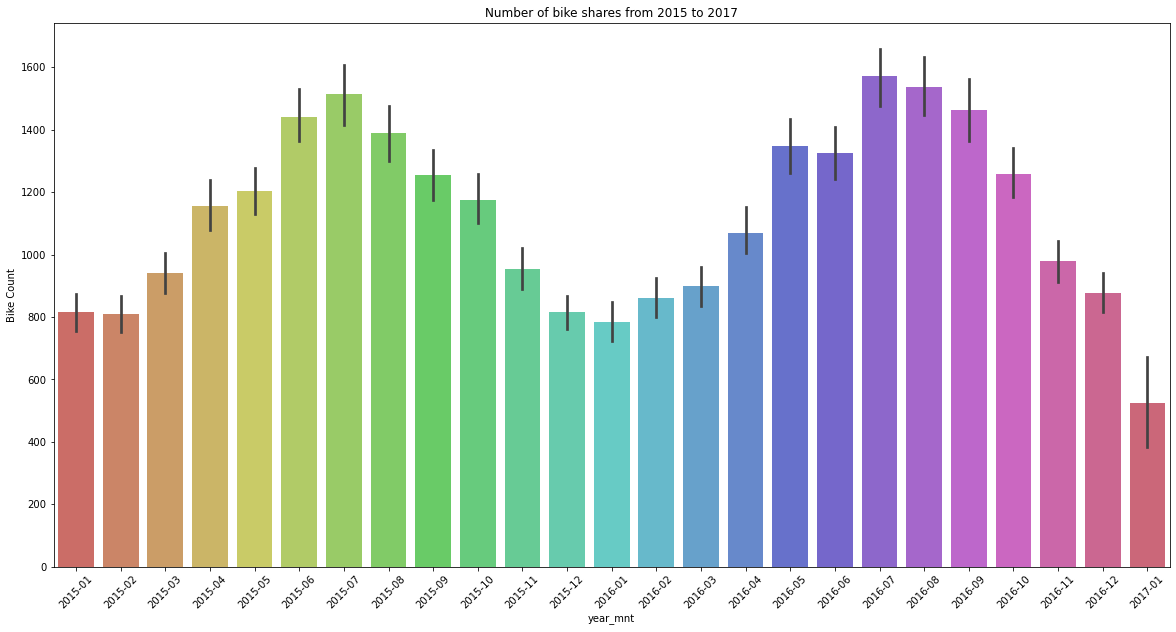

In [9]:
# Further checks to see why bike shares are low in 2017
df_copy['year_mnt'] = df_copy.timestamp.dt.to_period('M') #extract month-year column 


# Plot to show bike shares each year
plt.figure(figsize=(20,10))
sns.barplot(x='year_mnt', y='cnt', data=df_copy, palette='hls')
plt.ylabel("Bike Count")
plt.title("Number of bike shares from 2015 to 2017")
plt.xticks(rotation=45) # Rotate x labels 
plt.show()

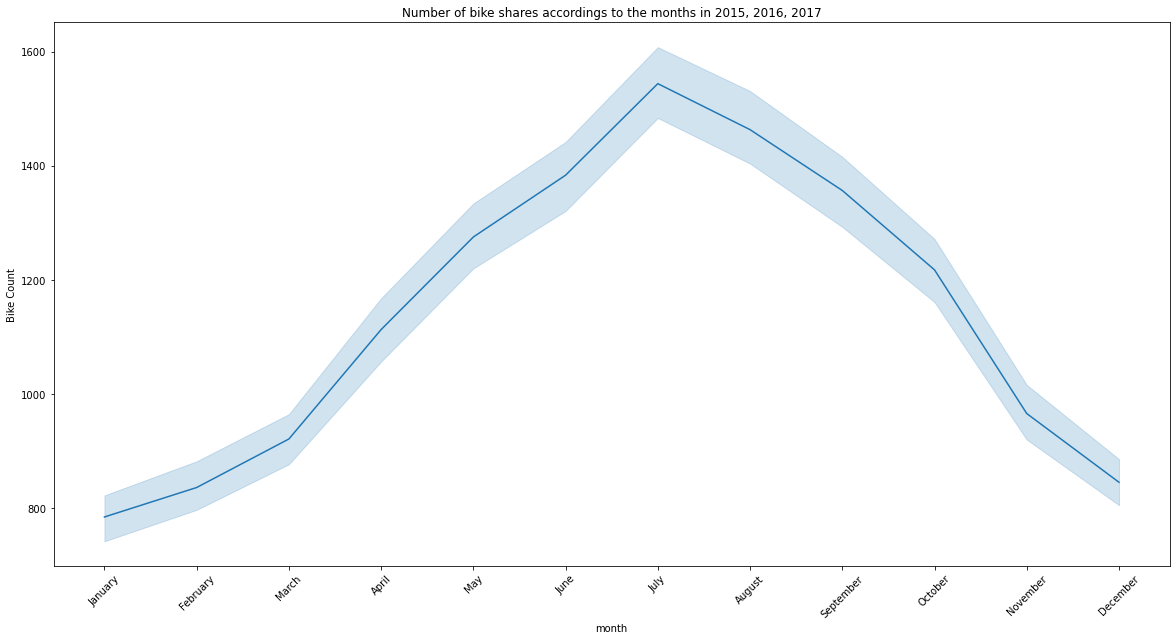

In [10]:
# Bike shares with respect to month to see peak months
plt.figure(figsize=(20,10))
sns.lineplot(data = df_copy, x = "month", y = "cnt")
plt.ylabel("Bike Count")
plt.xticks(rotation=45)
plt.title("Number of bike shares accordings to the months in 2015, 2016, 2017")
plt.show()

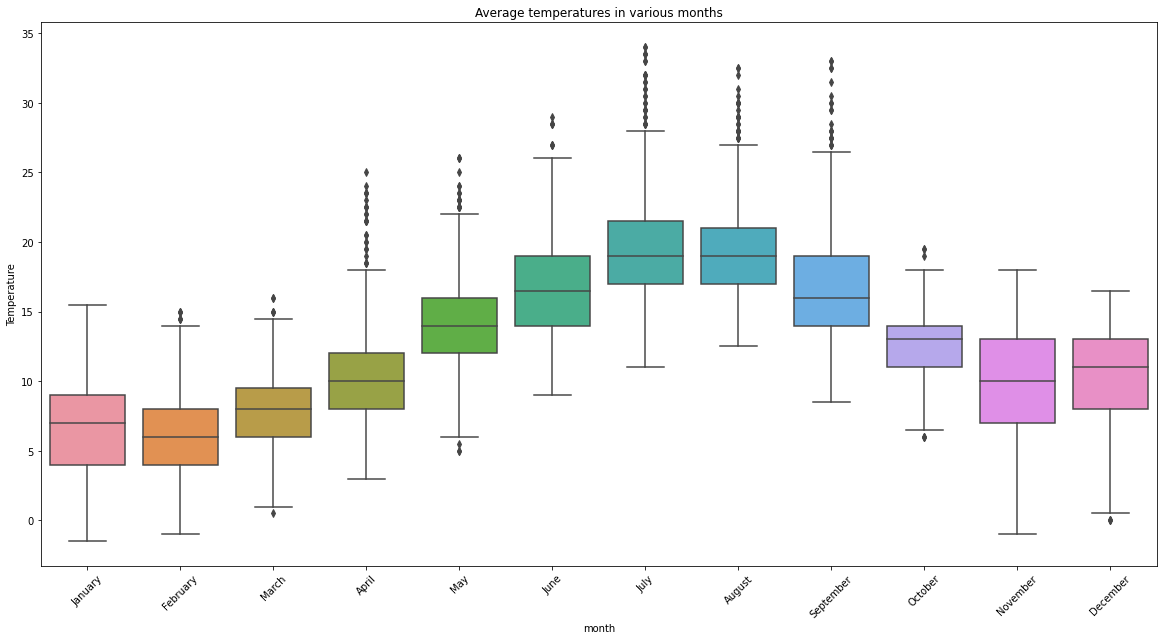

In [11]:
# Bike shares with respect to temperature in various months
plt.figure(figsize=(20,10))
sns.boxplot(data = df_copy, x = "month", y = "t1")
plt.ylabel("Temperature")
plt.xticks(rotation=45)
plt.title("Average temperatures in various months")
plt.show()

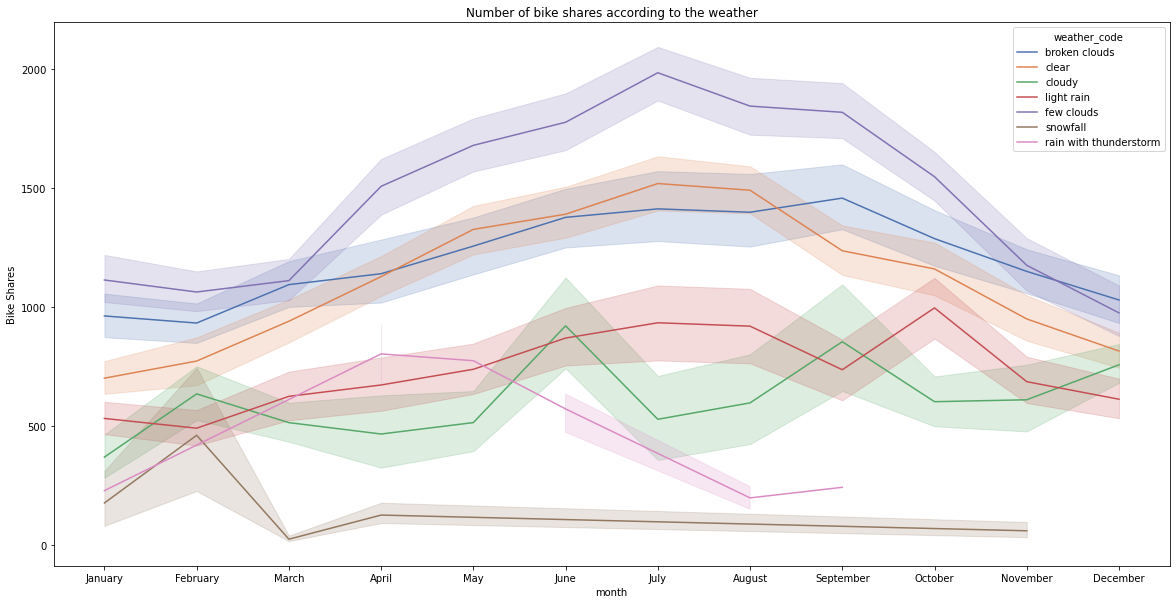

In [12]:
# Bike shares with respect to weather in various months
df_copy['weather_code'] = df_copy['weather_code'].map({1:'clear', 2:'few clouds', 3:'broken clouds', 4:'cloudy', 7:'light rain', 10:'rain with thunderstorm', 26:'snowfall'}) # rename weather code labels
plt.figure(figsize=(20,10))
sns.lineplot(data = df_copy, x = "month", y = "cnt", hue='weather_code', palette='deep')
plt.ylabel("Bike Shares")
plt.title("Number of bike shares according to the weather")
plt.show()

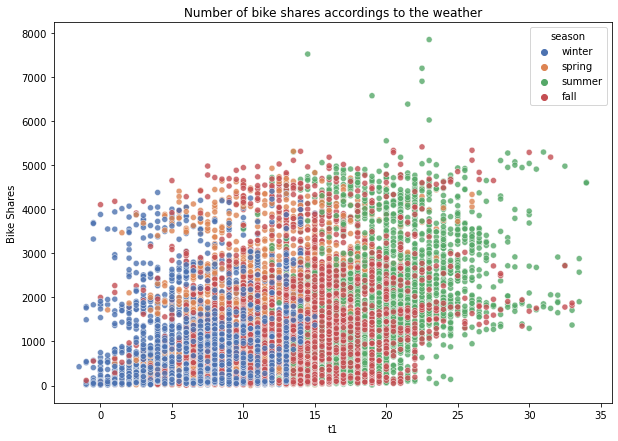

In [13]:
# Bike shares with respect to season
df_copy['season'] = df_copy['season'].map({0:'spring', 1:'summer', 2:'fall', 3:'winter'}) # rename season labels

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_copy, x = "t1", y = "cnt", hue='season', alpha=0.8, palette='deep')
plt.ylabel("Bike Shares")
plt.title("Number of bike shares accordings to the weather")
plt.show()

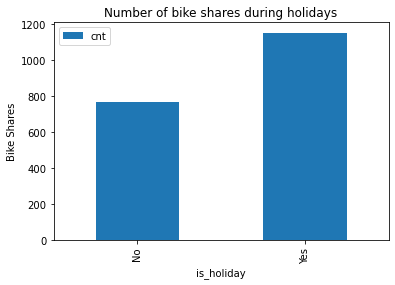

In [14]:
# Holiday bike shares
df_copy['is_holiday'] = df_copy['is_holiday'].map({0:'Yes', 1:'No'}) # rename holiday labels
df_is_holiday = df_copy.groupby(['is_holiday']).mean() # group df by is_holiday labels

# Plot holiday labels
df_is_holiday.plot.bar(y='cnt')
plt.ylabel("Bike Shares")
plt.title("Number of bike shares during holidays")
plt.show()

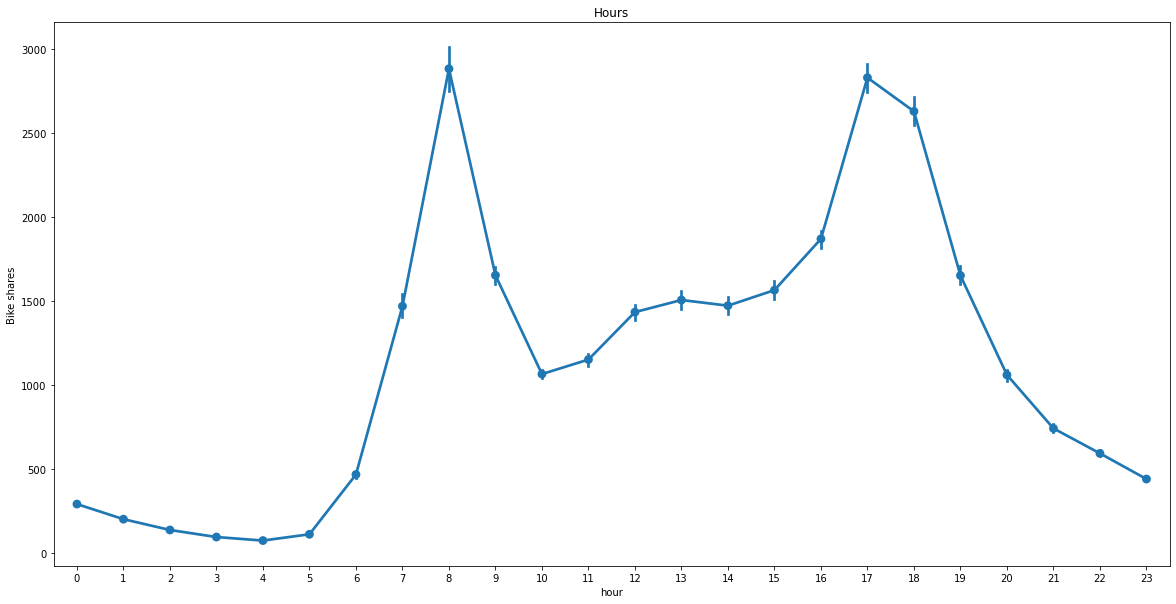

In [15]:
# Peak hours for bike shares
plt.figure(figsize=(20,10))
sns.pointplot(data = df_copy, x = "hour", y = "cnt")
plt.ylabel("Bike shares")
plt.title("Hours")
plt.show()

# Linear Regression

In [16]:
# Display 5 rows of the original dataset
display(df.head())

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [17]:
# Extract features from timestamp
df.timestamp = pd.to_datetime(df_copy['timestamp']) # Convert to datatime object


df['month'] = df.timestamp.dt.month.astype('float') # extract month column
df['day'] = df.timestamp.dt.day.astype('float') # extract days column
df['hour'] = df.timestamp.dt.hour.astype('float') # extract hours column

df = df.drop(columns=['timestamp'], axis = 1)
display(df.head())

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1.0,4.0,0.0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1.0,4.0,1.0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1.0,4.0,2.0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1.0,4.0,3.0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1.0,4.0,4.0


<Figure size 720x504 with 0 Axes>

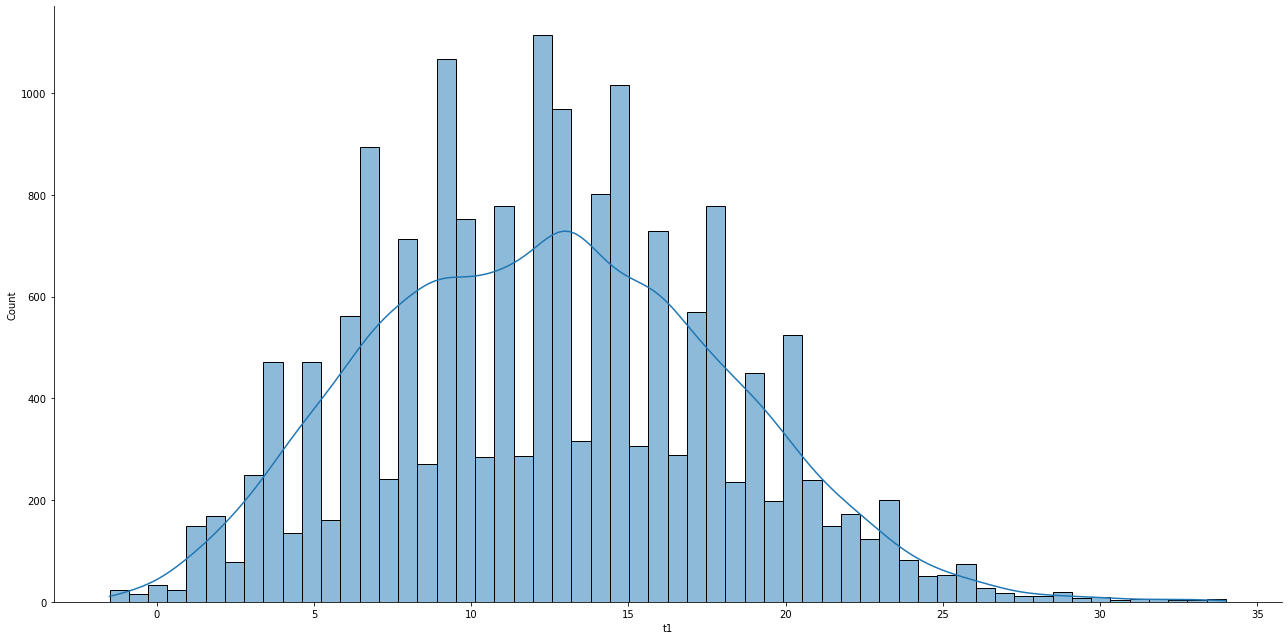

<Figure size 720x504 with 0 Axes>

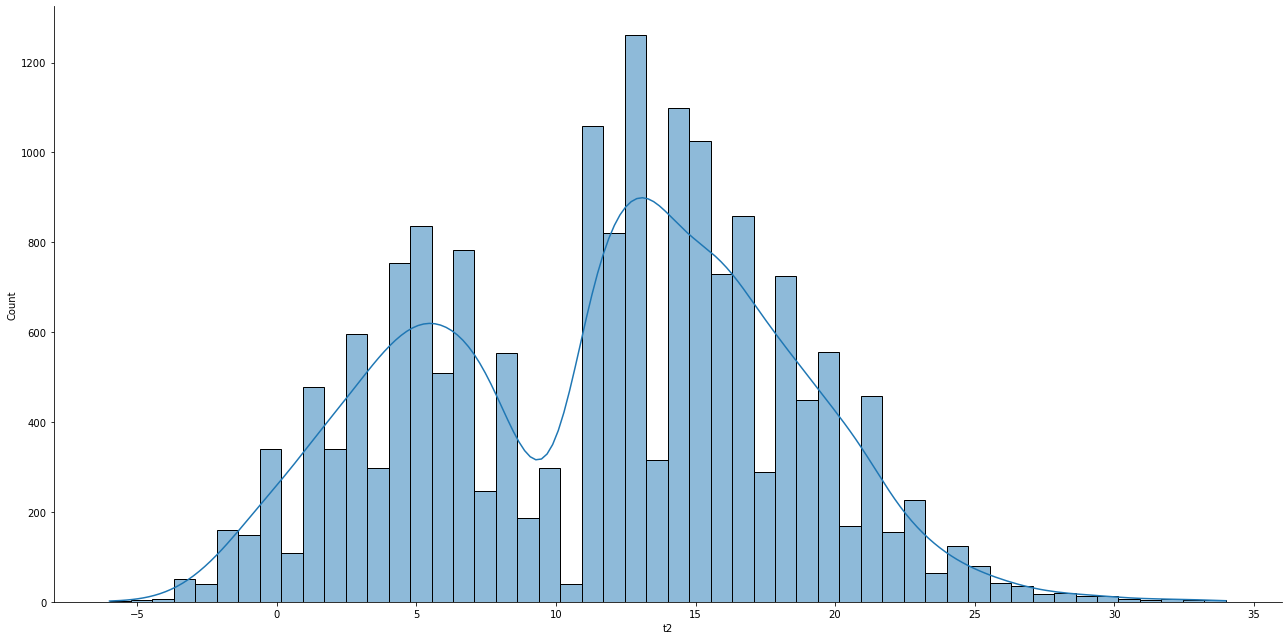

<Figure size 720x504 with 0 Axes>

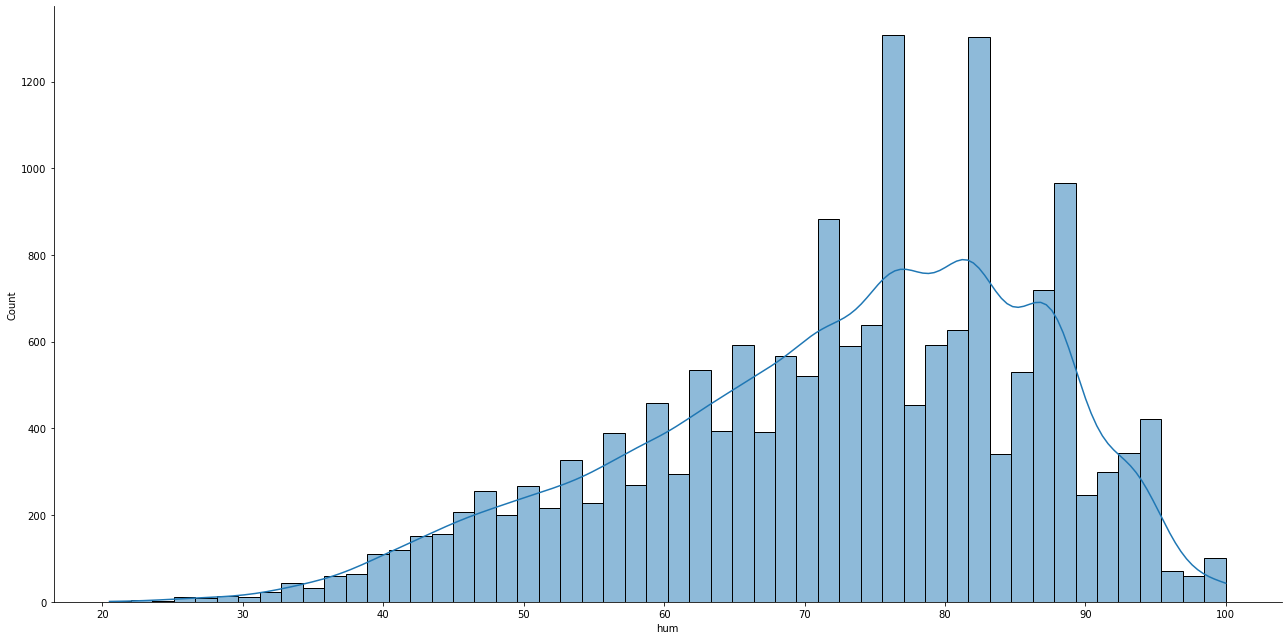

<Figure size 720x504 with 0 Axes>

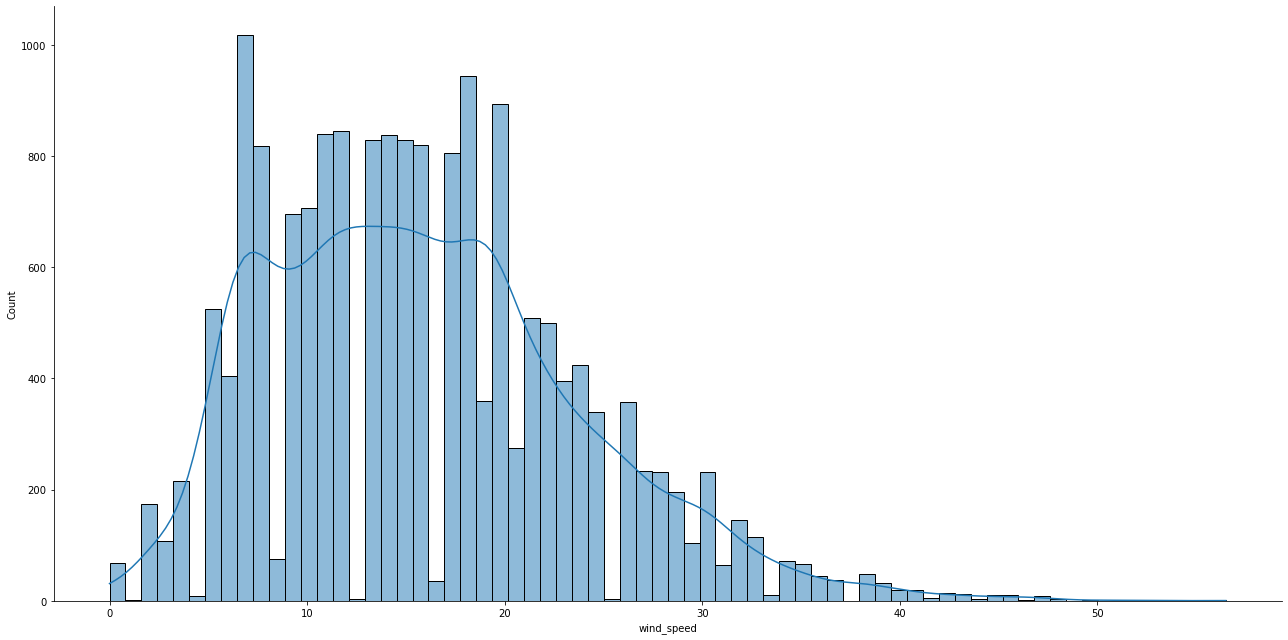

<Figure size 720x504 with 0 Axes>

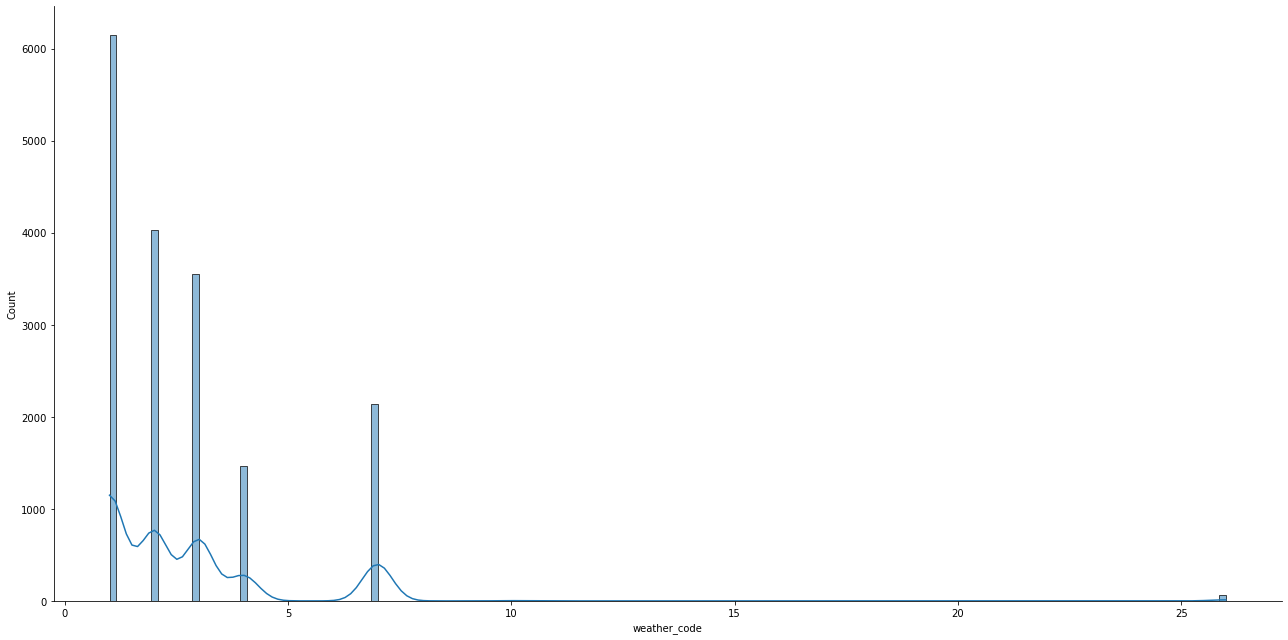

<Figure size 720x504 with 0 Axes>

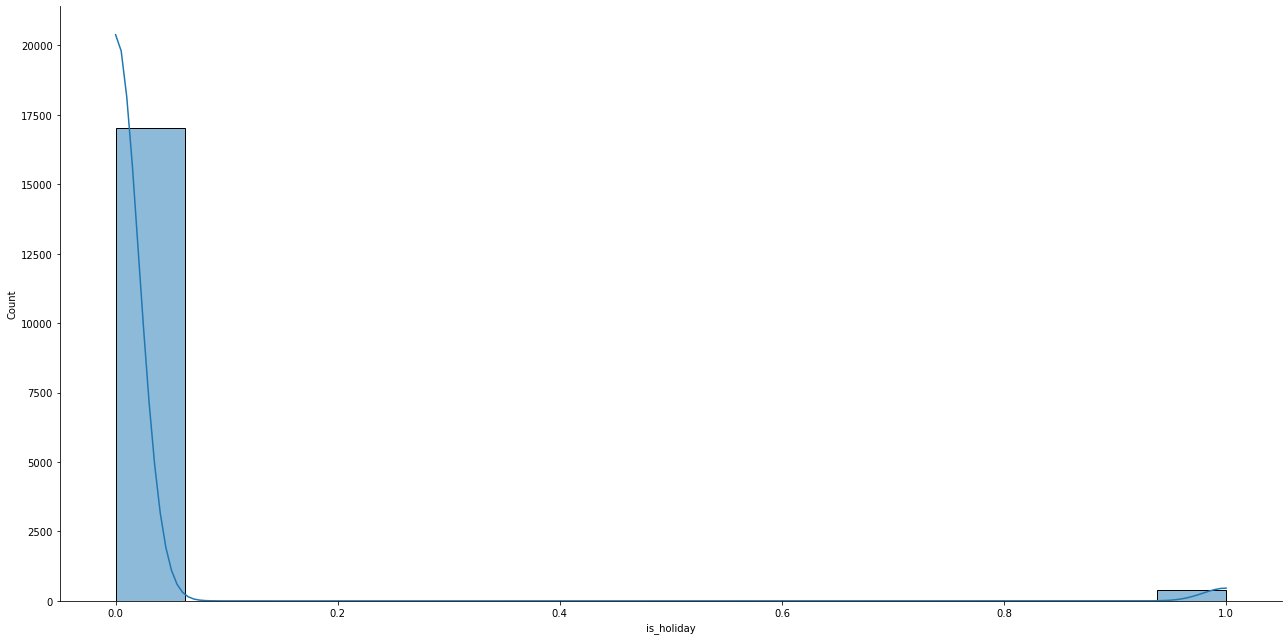

<Figure size 720x504 with 0 Axes>

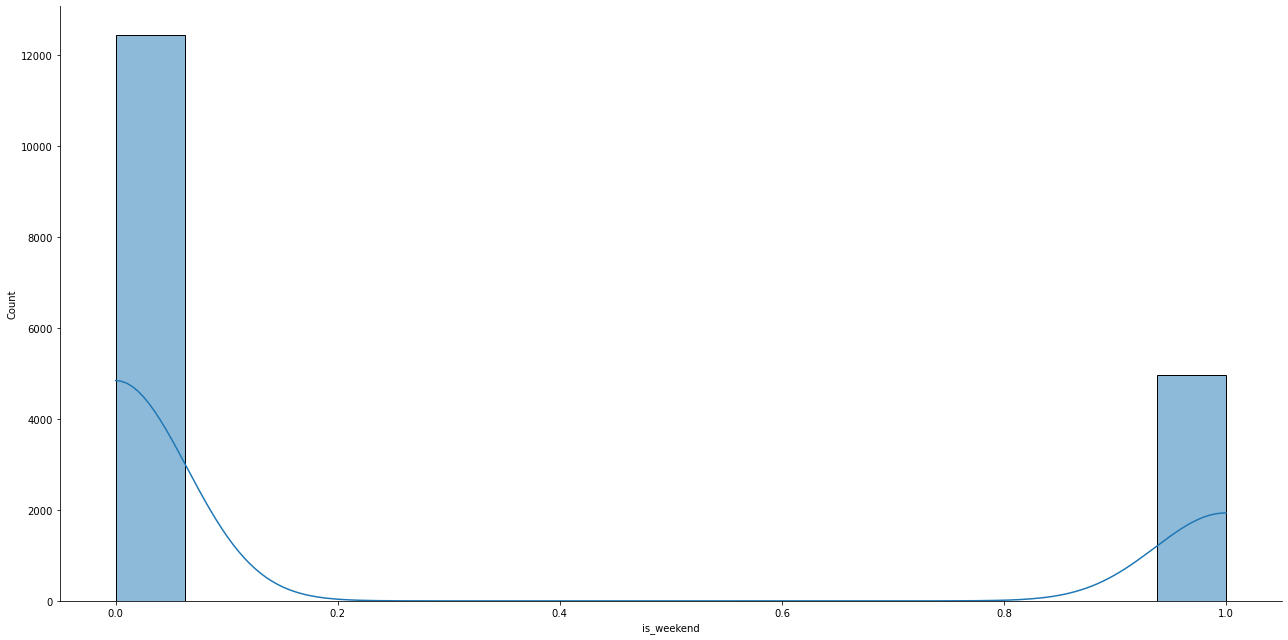

<Figure size 720x504 with 0 Axes>

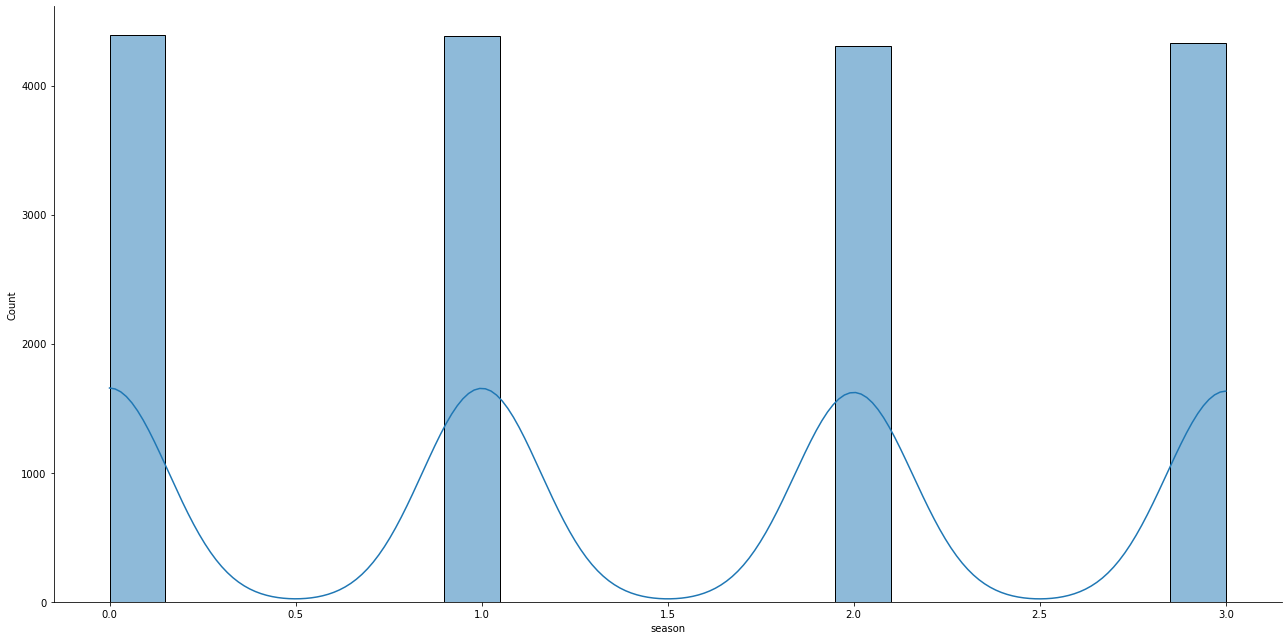

<Figure size 720x504 with 0 Axes>

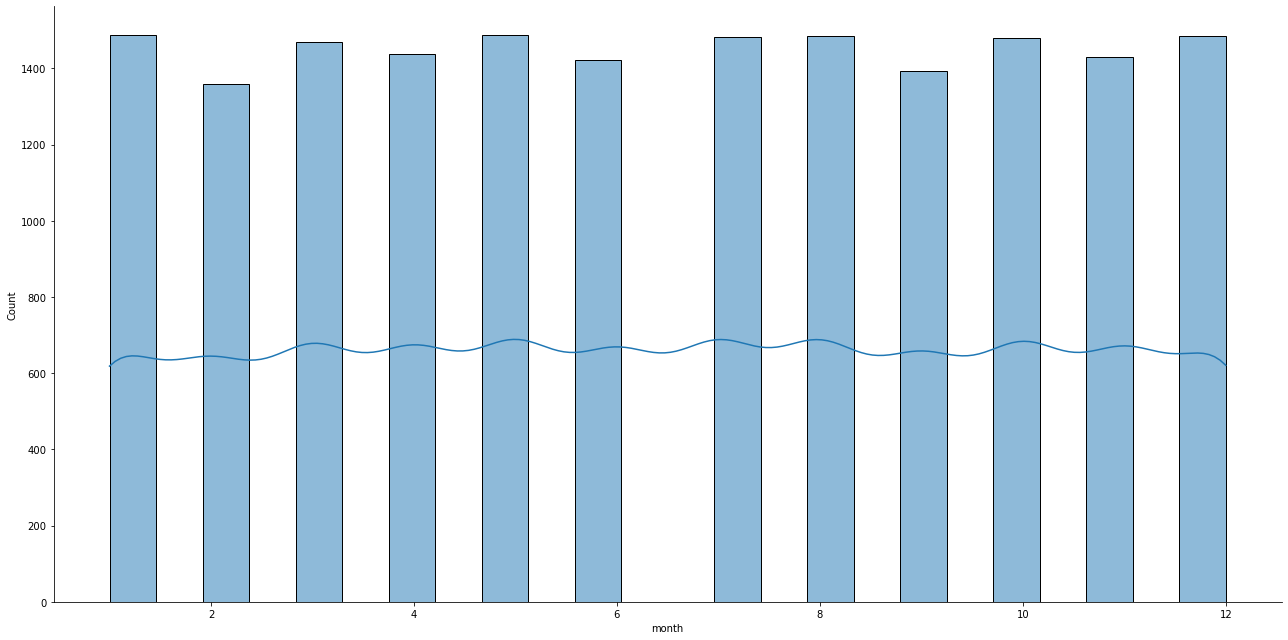

<Figure size 720x504 with 0 Axes>

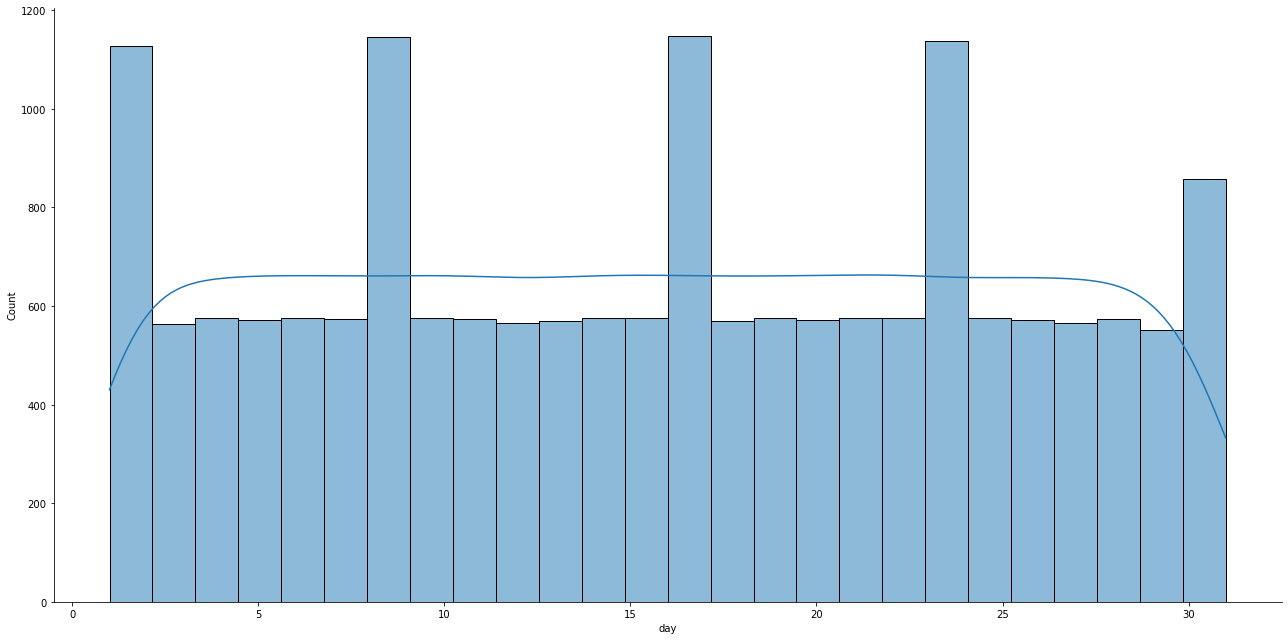

<Figure size 720x504 with 0 Axes>

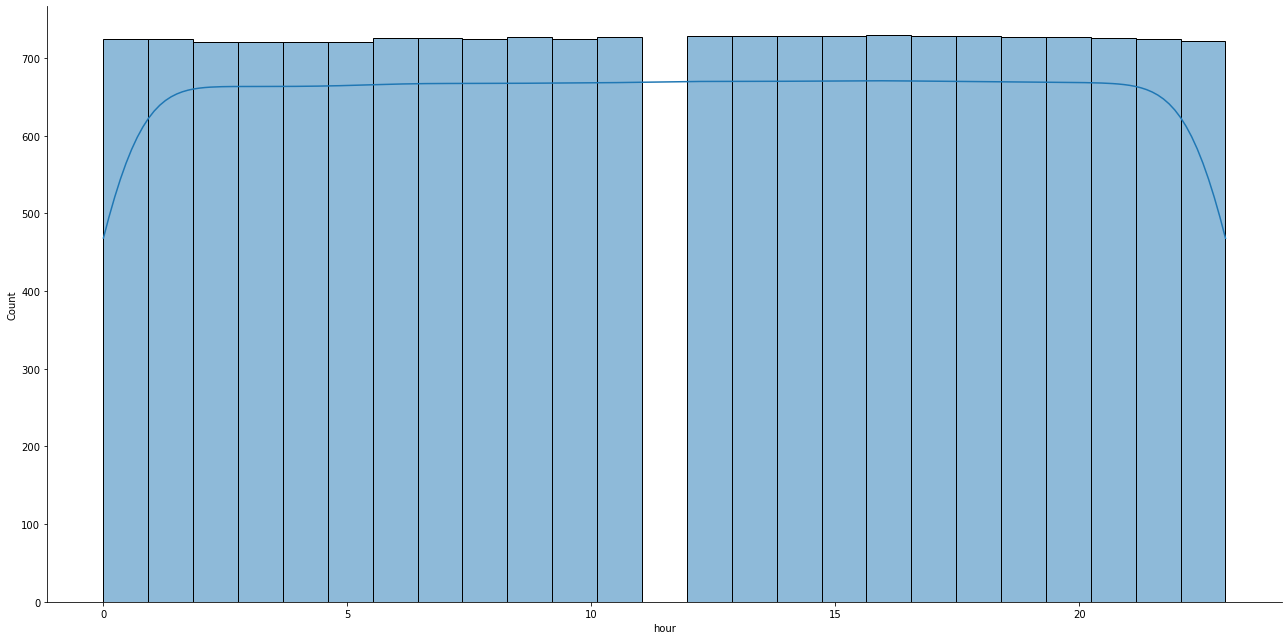

In [18]:
# Check distribution of features
features = [column_name for column_name in df.columns if column_name != 'cnt']

for feature in features:
    plt.figure(figsize=(10,7))
    sns.displot(x = feature, data = df, height = 9, aspect= 2, kde = True)
    plt.show()

<AxesSubplot:>

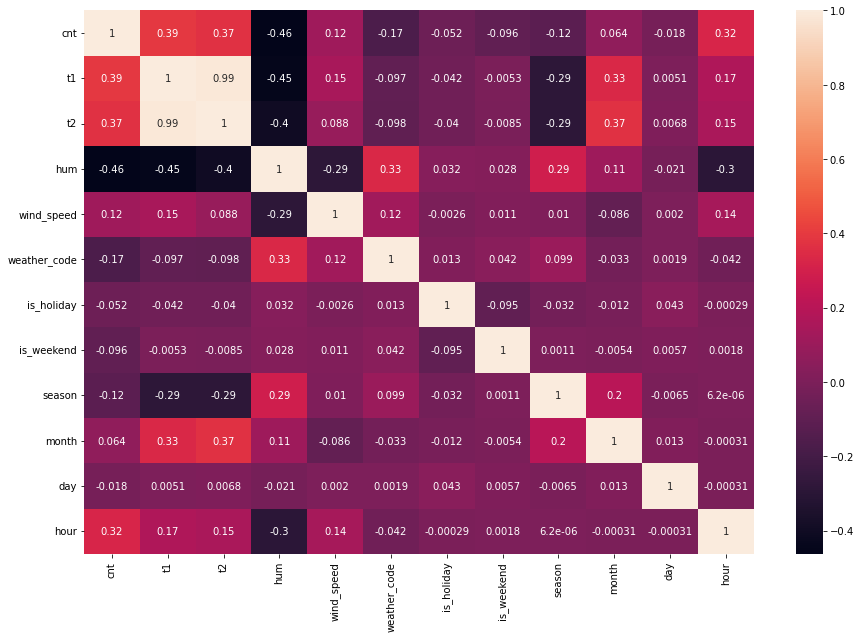

In [19]:
# Correlation matrix for dataset to observe patterns
df_corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True)

t1 and t2 are higly correlated. One needs to be dropped

## Group data into X features and Y label.


In [20]:
# Collect X features
features = [column_name for column_name in df.columns if column_name != 'cnt' and column_name != 't2']
X = df[features].values 

# Collect y label
y = df['cnt'].values

# display features and labels
print(X, '\n'*3,)
print(y)

[[ 3.  93.   6.  ...  1.   4.   0. ]
 [ 3.  93.   5.  ...  1.   4.   1. ]
 [ 2.5 96.5  0.  ...  1.   4.   2. ]
 ...
 [ 5.5 78.5 24.  ...  1.   3.  21. ]
 [ 5.5 76.  23.  ...  1.   3.  22. ]
 [ 5.  76.  22.  ...  1.   3.  23. ]] 



[182 138 134 ... 337 224 139]


In [21]:
X.shape

(17414, 10)

## Normalization


In [22]:
# Normalize X features
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.12676056 0.91194969 0.10619469 ... 0.         0.1        0.        ]
 [0.12676056 0.91194969 0.08849558 ... 0.         0.1        0.04347826]
 [0.11267606 0.95597484 0.         ... 0.         0.1        0.08695652]
 ...
 [0.1971831  0.72955975 0.42477876 ... 0.         0.06666667 0.91304348]
 [0.1971831  0.69811321 0.40707965 ... 0.         0.06666667 0.95652174]
 [0.18309859 0.69811321 0.38938053 ... 0.         0.06666667 1.        ]]


## Split data into test and training

In [23]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

In [24]:
# build model
model = LinearRegression(fit_intercept=True)  
model.fit(X_train, y_train)

print(model.coef_, '\n'*3)
print(model.intercept_)

[ 1530.4437094  -1873.08624156  -246.24534373  -301.54283424
  -263.67797414  -207.9986183    114.65390703    56.05005867
   -85.68838885   718.13275169] 



1510.7956827010767


In [25]:
# calculate the predictions of the linear regression model
y_pred = model.predict(X_test)

In [26]:
# Reference Code: Taken from Lab2 Ex 1

# build a new data frame with two columns, the actual values of the test data, and the predictions of the model
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_head = df_compare.head(25)
print(df_head)

    Actual    Predicted
0      705  1159.945633
1      958  1934.056343
2      497  1051.297209
3     1392  2329.496450
4     3073  1927.403179
5     2190  1941.818567
6      138  1271.210094
7     1350   760.633704
8     1845   985.215624
9     1705   907.806653
10    2256  1067.471625
11      60   371.074622
12      40   270.675311
13    3198  2114.020311
14    2271  1508.245780
15     173   306.070190
16     712  1396.325438
17      82   543.899769
18    1071  1215.974657
19     613   661.769394
20     109   399.147189
21    2476  1352.192674
22    1055  1452.974201
23    1210  1718.956735
24     371   478.927763


In [27]:
# Metrics and Evaluation
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:", round(metrics.median_absolute_error(y_test, y_pred), 2)) 
print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))

MSE: 837439.7229410122
RMSE: 915.1173274181908
MAE: 528.56
R2 score = 0.3


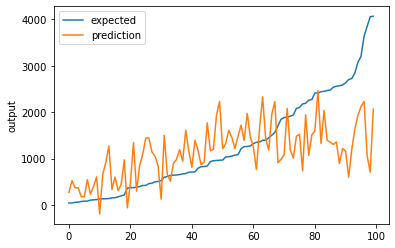

In [28]:
# Reference Code: Taken from Lab2 Ex 1
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
chart_regression(y_pred[:100],y_test[:100],sort=True)   

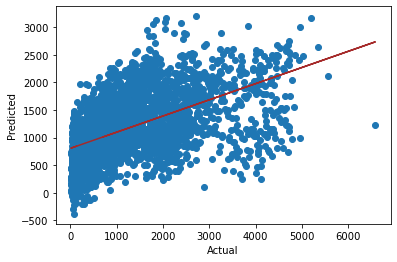

In [29]:
# Regression Plot Function
def regression_plot(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    poly_fit = np.polyfit(y_test, y_pred, 1) # Least square polynomial fit [Best fitting line]
    p = np.poly1d(poly_fit)  # define polynomial function
    plt.plot(y_test,p(y_test), color='brown') # plot graph
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
regression_plot(y_test, y_pred) # call regression plot function

# Improve model accurracy by removing outliers

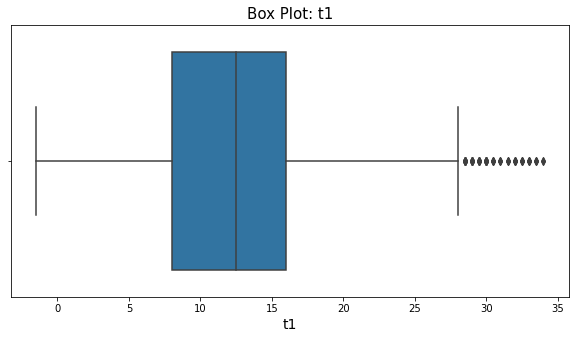

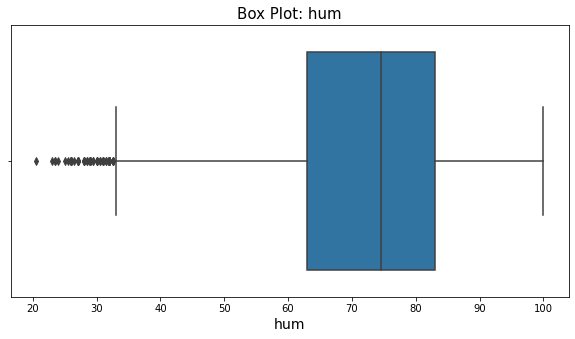

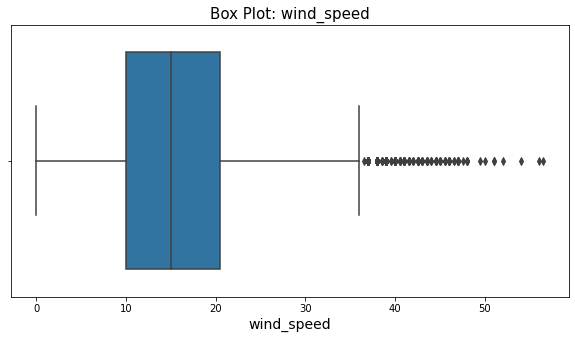

In [45]:
# Visualizing outliers with respect to the t1, t2, hum and windspeed

non_cat_features = ['t1','hum', 'wind_speed']

for feature in non_cat_features:
    fig = plt.figure(figsize=(10,5))
    sns.boxplot(x=df[feature])
    plt.title('Box Plot: {}'.format(feature), fontsize=15)
    plt.xlabel('{}'.format(feature), fontsize=14)
    plt.show()

From the graphs, we can notice that there is a huge number of outliers and that explains why our model performance is very low. We will handle the outliers by using **Interquatile range** to increase the model performance.

In [47]:
def IRQ(df, feature):
    # calculate interquartile range
    percentile25, percentile75 = np.percentile(df[feature], 25), np.percentile(df[feature], 75)
    iq_range = percentile75 - percentile25
    
    # calculate the outlier cutoff iqr rule
    cut_off = iq_range * 1.5
    lower_limit, upper_limit = percentile25 - cut_off, percentile75 + cut_off
    
    
    # Remove Outliers
    df1 = df[(df[feature] < upper_limit) & (df[feature] > lower_limit)]
    return df1


df1 = IRQ(df, 't1')
df1 = IRQ(df1, 'hum')
df1 = IRQ(df1, 'wind_speed')

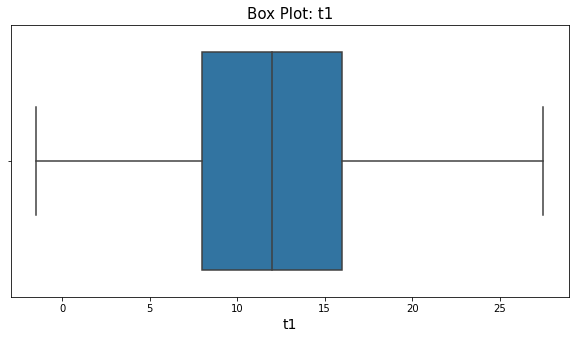

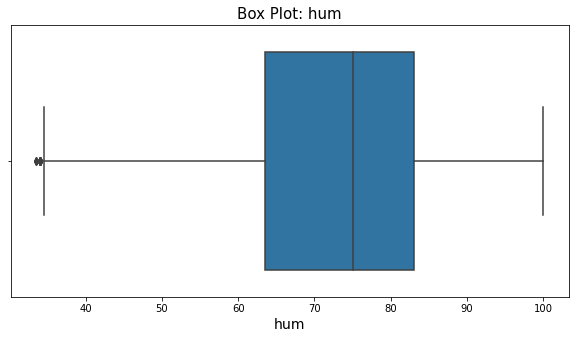

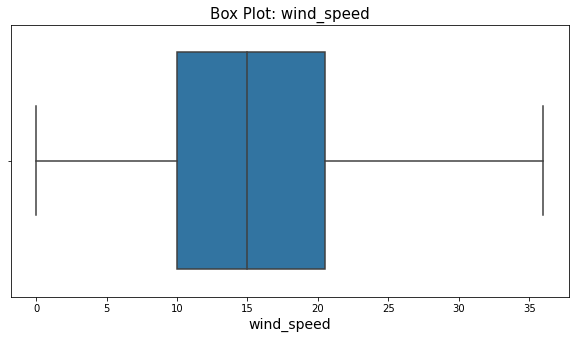

In [49]:
# Check for outliers again
# Visualizing outliers with respect to the t1, t2, hum and windspeed

non_cat_features = ['t1', 'hum', 'wind_speed']

for feature in non_cat_features:
    fig = plt.figure(figsize=(10,5))
    sns.boxplot(x=df1[feature])
    plt.title('Box Plot: {}'.format(feature), fontsize=15)
    plt.xlabel('{}'.format(feature), fontsize=14)
    plt.show()

## Retrain Model

In [50]:
# Collect X features
features = [column_name for column_name in df1.columns if column_name != 'cnt' and column_name != 't2']
X = df1[features].values 

# Collect y label
y = df1['cnt'].values

# display features and labels
print(X, '\n'*3,)
print(y)

[[ 3.  93.   6.  ...  1.   4.   0. ]
 [ 3.  93.   5.  ...  1.   4.   1. ]
 [ 2.5 96.5  0.  ...  1.   4.   2. ]
 ...
 [ 5.5 78.5 24.  ...  1.   3.  21. ]
 [ 5.5 76.  23.  ...  1.   3.  22. ]
 [ 5.  76.  22.  ...  1.   3.  23. ]] 



[182 138 134 ... 337 224 139]


In [51]:
# Normalize X features
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.15517241 0.89473684 0.16666667 ... 0.         0.1        0.        ]
 [0.15517241 0.89473684 0.13888889 ... 0.         0.1        0.04347826]
 [0.13793103 0.94736842 0.         ... 0.         0.1        0.08695652]
 ...
 [0.24137931 0.67669173 0.66666667 ... 0.         0.06666667 0.91304348]
 [0.24137931 0.63909774 0.63888889 ... 0.         0.06666667 0.95652174]
 [0.22413793 0.63909774 0.61111111 ... 0.         0.06666667 1.        ]]


In [52]:
# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

In [53]:
# build model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [54]:
#calculate the predictions of the linear regression model
y_pred = model.predict(X_test)

In [55]:
# Metrics and Evaluation
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:", round(metrics.median_absolute_error(y_test, y_pred), 2)) 
print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))

MSE: 807915.1261212744
RMSE: 898.8409904545266
MAE: 511.19
R2 score = 0.3


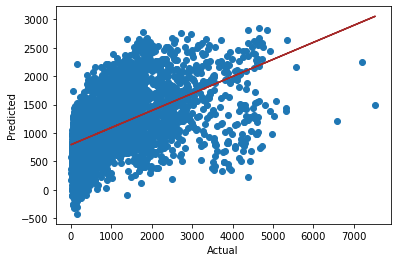

In [56]:
# Display regression plot
regression_plot(y_test, y_pred)

We can see that the metrics have improved after removing outliers and some features but it is still not good enough to conclude and use the model because the accuracy is still poor. We can conclude that linear regression is not suited for this dataset because the relationship between the features and the target is not linear. To improve the accuracy, we will use a more powerful algorithm to tackle the case of non-linearity. We will use **Decision Tree Regression** which learns by splitting the training examples in a way such that the sum of squared residuals is minimized. Since Decision trees are not sensitive to outliers, we will use the original dataset with outliers to train retrain the model.

In [57]:
# Collect X features
features = [column_name for column_name in df.columns if column_name != 'cnt']
X = df[features].values

# Collect y label
y = df['cnt']

# display features and labels
print(X)

[[ 3.   2.  93.  ...  1.   4.   0. ]
 [ 3.   2.5 93.  ...  1.   4.   1. ]
 [ 2.5  2.5 96.5 ...  1.   4.   2. ]
 ...
 [ 5.5  1.5 78.5 ...  1.   3.  21. ]
 [ 5.5  1.5 76.  ...  1.   3.  22. ]
 [ 5.   1.  76.  ...  1.   3.  23. ]]


In [58]:
# Normalize X features
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.12676056 0.2        0.91194969 ... 0.         0.1        0.        ]
 [0.12676056 0.2125     0.91194969 ... 0.         0.1        0.04347826]
 [0.11267606 0.2125     0.95597484 ... 0.         0.1        0.08695652]
 ...
 [0.1971831  0.1875     0.72955975 ... 0.         0.06666667 0.91304348]
 [0.1971831  0.1875     0.69811321 ... 0.         0.06666667 0.95652174]
 [0.18309859 0.175      0.69811321 ... 0.         0.06666667 1.        ]]


In [59]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

In [60]:
# Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor 

# build model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [61]:
# predictions of the linear regression model
y_pred = model.predict(X_test)

In [62]:
# Metrics and Evaluation
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:", round(metrics.median_absolute_error(y_test, y_pred), 2)) 
print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))

MSE: 107078.54263565892
RMSE: 327.2285785741504
MAE: 97.0
R2 score = 0.91


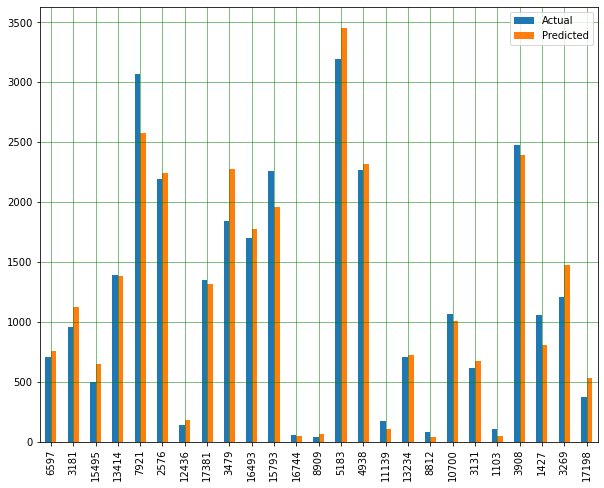

In [63]:
# Reference Code: Taken from Lab2 Ex 1# Reference Code: Taken from Lab2 Ex 1
# build a new data frame with two columns, the actual values of the test data, and the predictions of the model
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_head = df_compare.head(25)

df_head.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

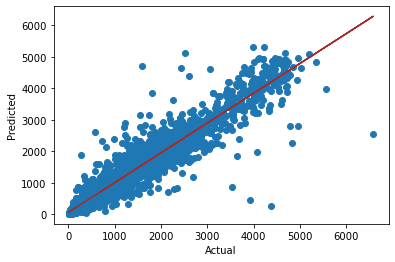

In [64]:
# Display the decision tree regression plot
regression_plot(y_test, y_pred)

Hmmmmm. We can see that the performance of the model increase drastically with the use of Decision Tree Regressor and Linear Regression doesn't fit this dataset because of its non-linearity. With a better accuracy, mean square error and root mean square error on decision trees, we can try **Random Forest** algorithm for predicition to see the outcome

In [65]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
# predictions of the linear regression model
y_pred = model.predict(X_test)

In [67]:
# Metrics and Evaluation
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:", round(metrics.median_absolute_error(y_test, y_pred), 2)) 
print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))

MSE: 54644.47948107953
RMSE: 233.76158683812773
MAE: 71.23
R2 score = 0.95


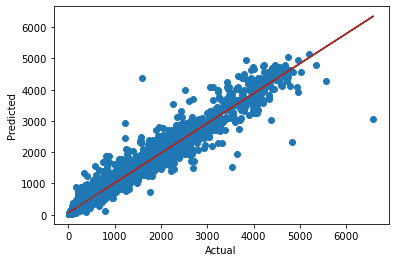

In [68]:
# Display the random forest regression plot
regression_plot(y_test, y_pred)

# Final Conclusion
We can see that Random Forest Regressor provides better accuracy and metrics as compared to Decision Tree and it is expected because Random Forest generalize data in a better way as compared to Decision Tree